In [1]:
# Install R
!apt-get install r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
# Install R packages
!R -e "install.packages('ggplot2', repos='http://cran.rstudio.com/')"
!R -e "install.packages('plotly', repos='http://cran.rstudio.com/')"
!R -e "install.packages('wordcloud2', repos='http://cran.rstudio.com/')"
!R -e "install.packages('RColorBrewer', repos='http://cran.rstudio.com/')"
!R -e "install.packages('tm', repos='http://cran.rstudio.com/')"
!R -e "install.packages('NLP', repos='http://cran.rstudio.com/')"



R version 4.4.1 (2024-06-14) -- "Race for Your Life"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('ggplot2', repos='http://cran.rstudio.com/')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.rstudio.com/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB

* installing *so

In [8]:
%%R
# Load necessary libraries
library(ggplot2)
library(plotly)
library(wordcloud2)
library(RColorBrewer)
library(tm)  # For text mining operations

# Load the dataset (replace '/content/path_to_your_dataset.csv' with your actual file path)
housing_data <- read.csv('USA_Housing')

# View column names to confirm
print(colnames(housing_data))



Error in file(file, "rt") : cannot open the connection


In [3]:
# Load rpy2 library
%load_ext rpy2.ipython



In [9]:
%%R
# Word Chart
# Create a Term Document Matrix
corpus <- Corpus(VectorSource(housing_data$Address))
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("en"))

dtm <- TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
word_freqs <- sort(rowSums(m), decreasing=TRUE)
word_freqs_df <- data.frame(word=names(word_freqs), freq=word_freqs)

wordcloud2(word_freqs_df, size=0.5, color='random-light')


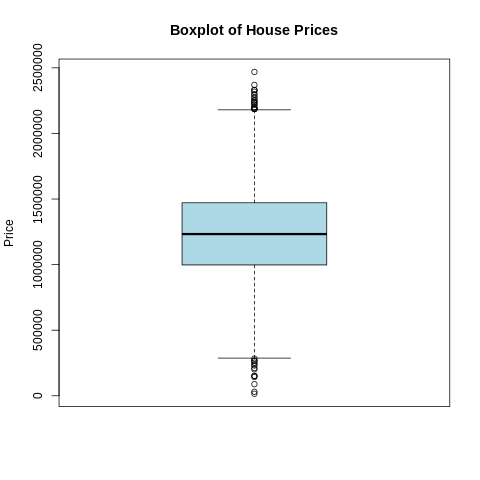

In [10]:
%%R
# Box and Whisker Plot
boxplot(housing_data$Price, main = "Boxplot of House Prices", ylab = "Price", col = "lightblue", border = "black")


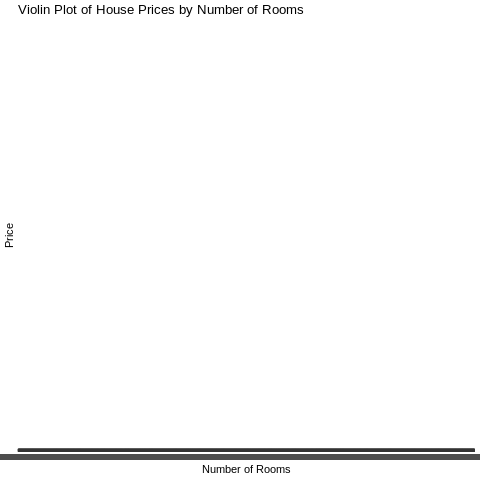

In [11]:
%%R
# Violin Plot
ggplot(housing_data, aes(x = as.factor(Avg..Area.Number.of.Rooms), y = Price)) +
  geom_violin(fill = "lightblue") +
  labs(title = "Violin Plot of House Prices by Number of Rooms", x = "Number of Rooms", y = "Price")


`geom_smooth()` using formula = 'y ~ x'


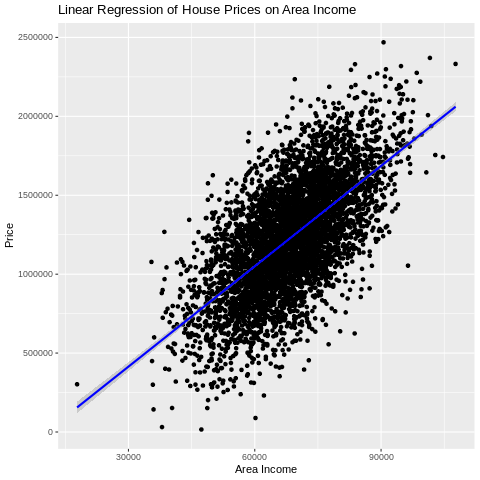

In [12]:
%%R
# Linear Regression Plot
ggplot(housing_data, aes(x = Avg..Area.Income, y = Price)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression of House Prices on Area Income", x = "Area Income", y = "Price")


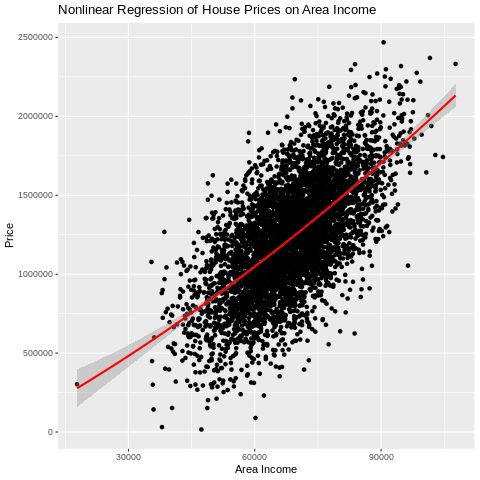

In [13]:
%%R
# Nonlinear Regression Plot
ggplot(housing_data, aes(x = Avg..Area.Income, y = Price)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), col = "red") +
  labs(title = "Nonlinear Regression of House Prices on Area Income", x = "Area Income", y = "Price")


In [15]:
%%R
# 3D Scatter Plot
library(plotly)
plot_ly(housing_data, x = ~Avg..Area.Income, y = ~Avg..Area.Number.of.Rooms, z = ~Price,
        type = "scatter3d", mode = "markers", color = ~Price, colors = colorRamp(c("blue", "red"))) %>%
  layout(title = "3D Scatter Plot of House Prices",
         scene = list(xaxis = list(title = 'Area Income'),
                      yaxis = list(title = 'Number of Rooms'),
                      zaxis = list(title = 'Price')))


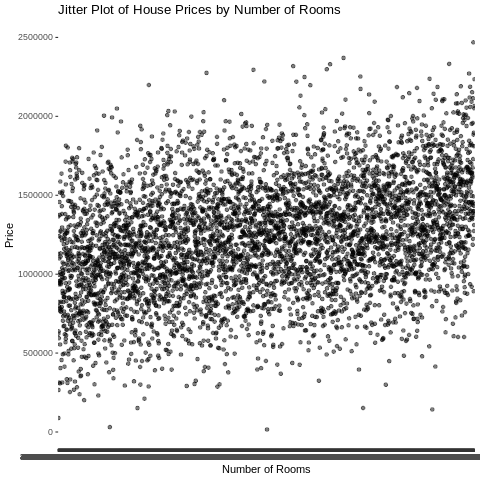

In [16]:
%%R
# Jitter Plot
ggplot(housing_data, aes(x = as.factor(Avg..Area.Number.of.Rooms), y = Price)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.5) +
  labs(title = "Jitter Plot of House Prices by Number of Rooms", x = "Number of Rooms", y = "Price")
